In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.activations import relu , softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import cv2 as cv

from sklearn.preprocessing import OneHotEncoder

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


The following fucntion gives the shape and number of examples of the training and testing dataset

In [5]:
def meta_data(i):
    print("X_train shape: ",x_train.shape)
    print("Y_train shape: ",y_train.shape)
    print("X_test shape: ",x_test.shape)
    print("X_train shape: ",y_test.shape)
    print("Image size: ",x_train[i].shape)
    print(set(y_train))
    plt.imshow(x_train[i],cmap = plt.cm.gray)
    plt.show()
def normal(x_train,x_test):
    x_train = x_train.astype('float32')
    x_train /= 255
    x_test = x_test.astype('float32')
    x_test /= 255
    return x_train, x_test

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
X_train shape:  (10000,)
Image size:  (28, 28)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


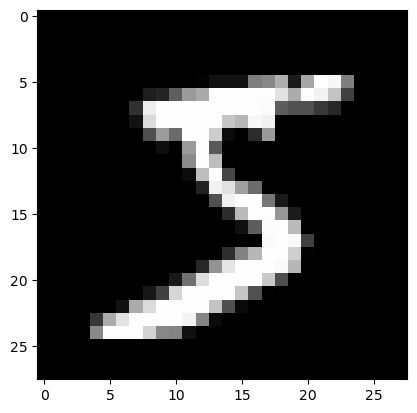

In [6]:
meta_data(0)

In [7]:
x_train_normal , x_test_normal = normal(x_train,x_test)

In [8]:
y_train =to_categorical(y_train)

In [9]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [10]:
y_train.shape

(60000, 10)

The next fucntion gives the Fully Connected Model its summary and compiles it

In [ ]:
def create_model():
        model = Sequential()
        model.add(Flatten(input_shape = [28,28]))
        model.add(Dense(1000,activation = relu))
        model.add(Dense(100,activation = relu ))
        model.add(Dense(10,activation = softmax))
        model.summary()
        model.compile(loss = categorical_crossentropy, optimizer = 'adam',metrics = ['accuracy'])
        return model
def fit_results(model):
    history = model.fit(x_train_normal,y_train,epochs = 10)
    return history
        
        

In [12]:
fcmodel = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 886,110
Trainable params: 886,110
Non-trainable params: 0
_________________________________________________________________


In [13]:

fcnn_history = fit_results(fcmodel)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1803 - accuracy: 0.9448
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0766 - accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0518 - accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0394 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0326 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0247 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0205 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0202 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0157 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step

The following cells do the same but make a Convolutional Network instead

In [14]:
conv1_model = Sequential()
conv1_model.add(Conv2D(32,5,strides = (1,1),input_shape = [28,28,1],activation = relu))
conv1_model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
conv1_model.add(Flatten())
conv1_model.add(Dense(100,activation = relu))
conv1_model.add(Dense(10,activation = softmax))

In [15]:
conv1_model.summary()
conv1_model.compile(loss = categorical_crossentropy, optimizer = 'adam',metrics = ['accuracy'])
hist_conv1 = conv1_model.fit(x_train_normal,y_train,epochs = 10,validation_split = 0.25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               460900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
________________________________________________

In [16]:
conv2_model = Sequential()
conv2_model.add(Conv2D(32,3,strides = 1,input_shape = [28,28,1],activation = relu))
conv2_model.add(Conv2D(32,3,strides = 1,activation = relu))
conv2_model.add(MaxPooling2D(pool_size = (2,2),strides = 1))
conv2_model.add(Flatten())
conv2_model.add(Dense(100,activation = relu))
conv2_model.add(Dense(10,activation = softmax))
conv2_model.summary()
conv2_model.compile(loss = categorical_crossentropy, optimizer = 'adam',metrics = ['accuracy'])
hist_conv2 = conv2_model.fit(x_train_normal,y_train,epochs = 10,validation_split = 0.25)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16928)             0         
                                                                 
 dense_5 (Dense)             (None, 100)               1692900   
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                      

The above summaries show that the Smaller Convolutional network has lesser trainable parameters than both the Deep Convolutional network and also the fully connected model. In this case the Conv1_model is the best out of the 3 since it gives similar accuracy with lesser trainable parameters.

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.99      0.99      0.99      1137
           2       0.99      0.98      0.98      1037
           3       0.98      0.97      0.98      1024
           4       0.99      0.99      0.99       981
           5       0.99      0.97      0.98       910
           6       0.99      0.98      0.99       966
           7       0.97      1.00      0.98      1003
           8       0.99      0.98      0.98       979
           9       0.96      0.99      0.97       985

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

(10000,)
(10000,)


<AxesSubplot:>

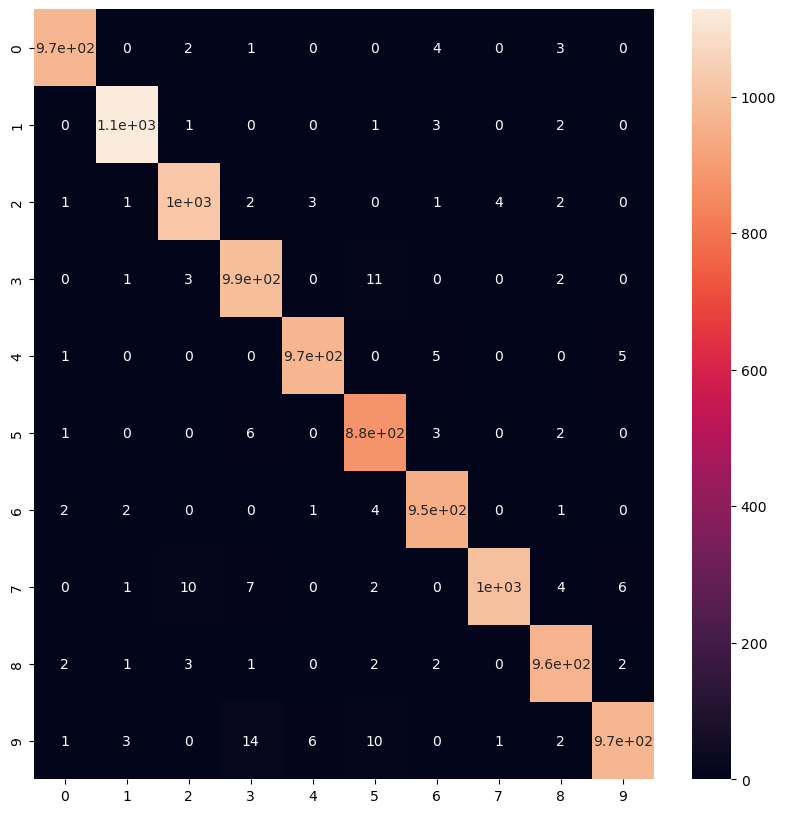

In [17]:
y_pred = conv1_model.predict(x_test_normal)
y_pred = y_pred.argmax(axis = 1)
print(classification_report(y_pred,y_test))
print(y_test.shape)
print(y_pred.shape)
plt.figure(figsize = (10,10))
sbn.heatmap(confusion_matrix(y_test, y_pred),annot = True)
   

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       986
           1       0.99      1.00      0.99      1124
           2       0.99      0.98      0.99      1042
           3       0.99      0.98      0.99      1024
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       896
           6       0.99      0.99      0.99       950
           7       0.99      0.98      0.98      1033
           8       0.98      0.99      0.99       966
           9       0.98      0.99      0.98       997

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

(10000,)
(10000,)


<AxesSubplot:>

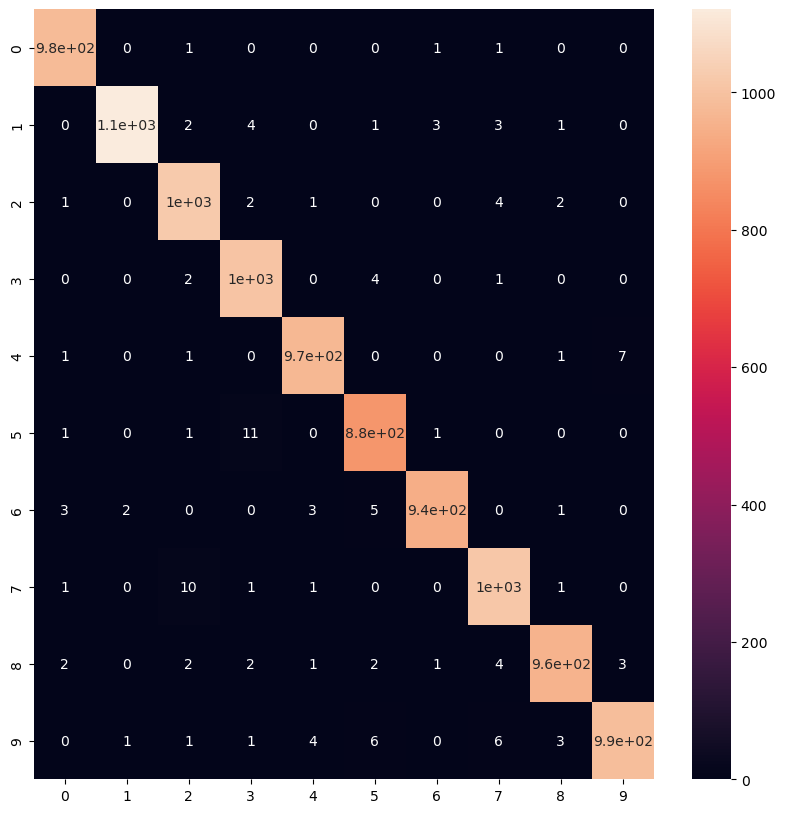

In [18]:
y_pred = conv2_model.predict(x_test_normal)
y_pred = y_pred.argmax(axis = 1)
print(classification_report(y_pred,y_test))
print(y_test.shape)
print(y_pred.shape)
plt.figure(figsize = (10,10))
sbn.heatmap(confusion_matrix(y_test, y_pred),annot = True)

The above 2 cells show the performance of the 2 models over the testing data. The results are more or less the same hence model 1 is preferred due to faster running time.

In [19]:
hist1 = pd.DataFrame(hist_conv1.history)
hist2 = pd.DataFrame(hist_conv2.history)

In [20]:
hist1

,loss,accuracy,val_loss,val_accuracy
0,0.156551,0.952289,0.070845,0.978467
1,0.051975,0.984267,0.053790,0.983800
2,0.032833,0.989756,0.064858,0.980800
3,0.023034,0.992244,0.051055,0.985133
4,0.016116,0.994933,0.057048,0.984800
5,0.013086,0.995533,0.051898,0.987333
6,0.008254,0.997133,0.068179,0.985000
7,0.008892,0.996800,0.054882,0.987200
8,0.006546,0.997800,0.070118,0.984000
9,0.004936,0.998333,0.075674,0.984200


In [21]:
def loss_plot(df):
    plt.plot(df.index,df['loss'],color = 'r',label = 'Loss')
    plt.plot(df.index,df['val_loss'],color = 'g',label = 'Validation Loss')
    plt.legend()
    plt.xlabel("EPochs")
    plt.ylabel("Loss")
    plt.show()

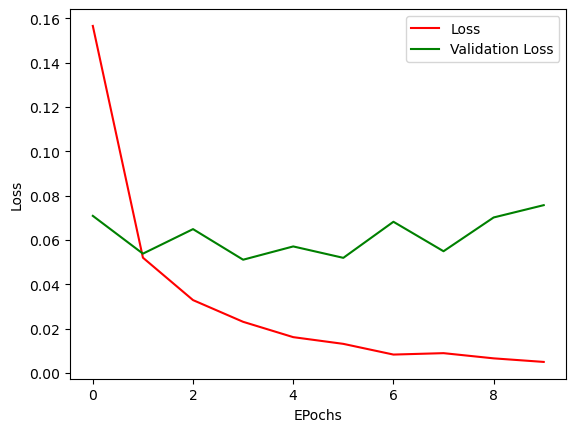

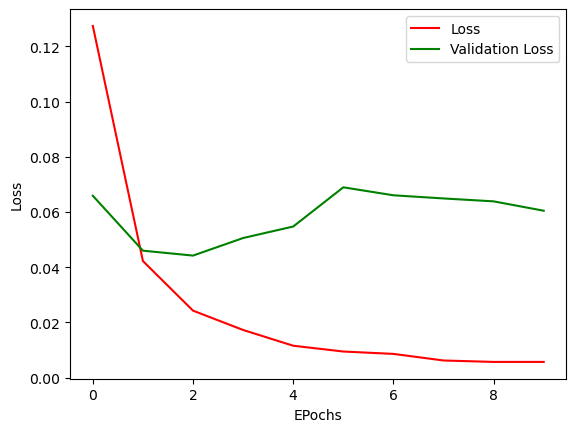

In [25]:
loss_plot(hist1)
loss_plot(hist2)

The Above 2 graphs show the loss across epochs for convnet 1 and 2 respectively. The validation loss for the first model increases after a while indicating overfitting to training data while the second model doenst overfit whatsoever as the validation loss remains more or less the same.
